# Here's a Jupyter Notebook demonstrating the use of various functions for visualizing inference results and handling overlapping crops:

In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
from functions_extra import visualize_results_usual_yolo_inference, get_crops

## YOLOv8-seg - instance segmentation vizualization example:

1. function visualize_results_usual_yolo_inference:


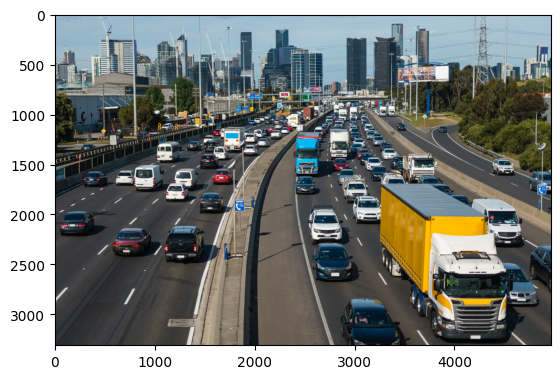

In [2]:
img_path = 'test_images/image-test.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB));

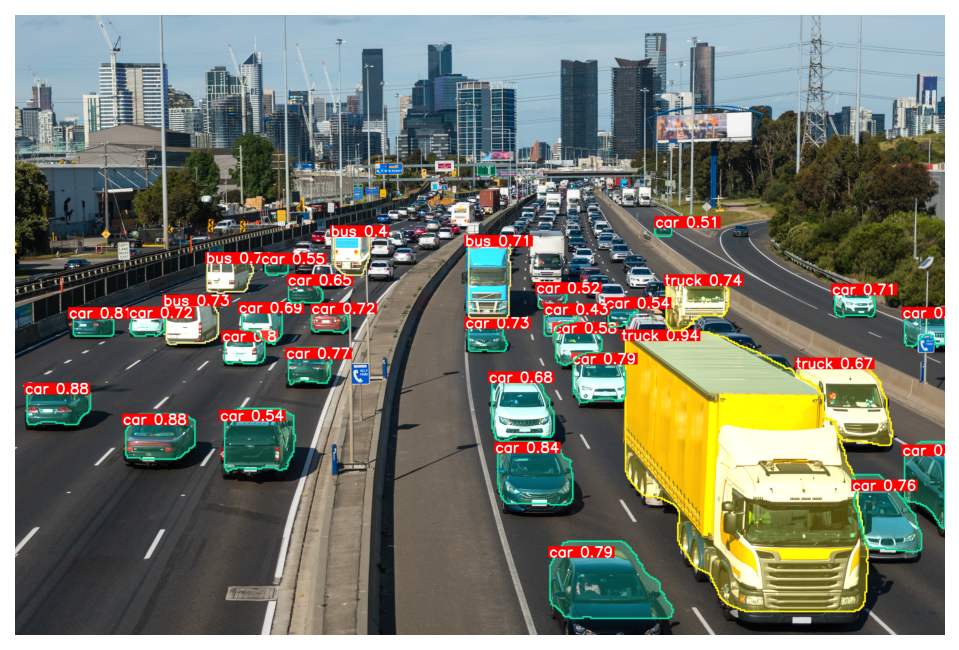

In [3]:
# Define the parameters
imgsz = 640
conf = 0.4
iou = 0.7

# Load the YOLOv8 model
model = YOLO("yolov8m-seg.pt")  # Make sure the model file is in the correct path

visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=True,
    delta_colors=3,
    thickness=8,
    font_scale=2.5,
    show_boxes=False,
    fill_mask=True,
    alpha=0.3,
    random_object_colors=False,
    show_confidences=True,
)

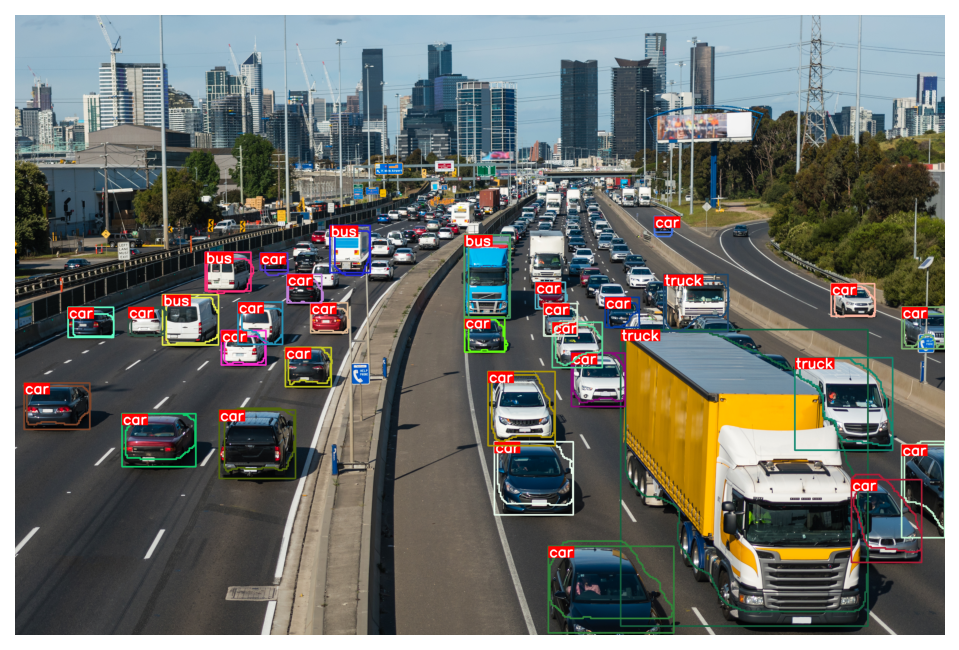

In [4]:
visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=True,
    delta_colors=3,
    thickness=8,
    font_scale=2.5,
    show_boxes=True,
    fill_mask=False,
    alpha=0.4,
    random_object_colors=True,
    show_confidences=False,
)

## YOLOv8 - detection vizualization example:

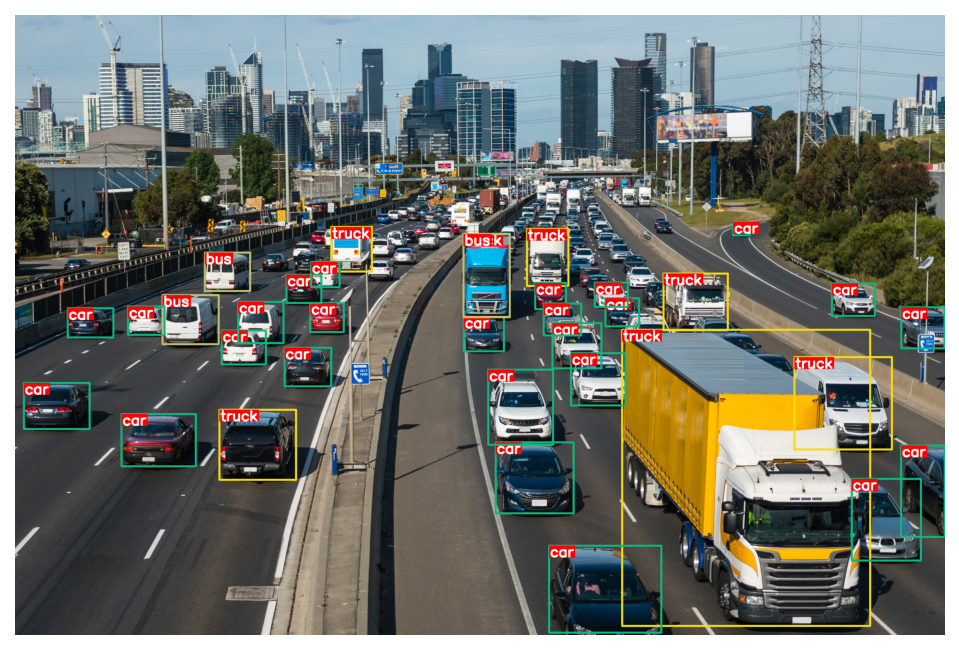

In [5]:
# Load the YOLOv8 model
model = YOLO("yolov8l.pt")  # Make sure the model file is in the correct path

# Load the image (replace 'path_to_your_image.jpg' with the actual path to your image)
img_path = "test_images/image-test.jpg"
img = cv2.imread(img_path)

visualize_results_usual_yolo_inference(
    img,
    model,
    imgsz,
    conf,
    iou,
    segment=False,
    delta_colors=3,
    thickness=9,
    font_scale=2.5,
    show_boxes=True,
    random_object_colors=False,
    show_confidences=False,
)

---

## Cropping with Overlapping:

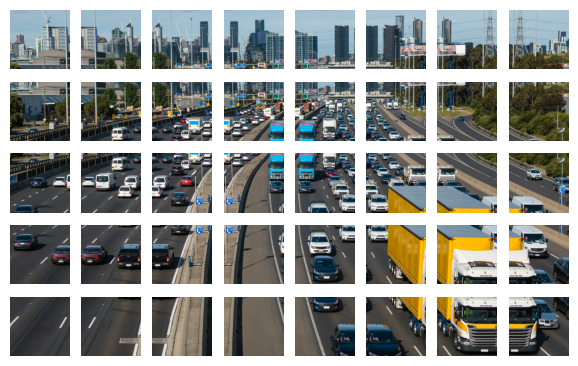

Number of generated images: 40


In [6]:
img_path = 'test_images/image-test.jpg'
image = cv2.imread(img_path)

data_all_crops = get_crops(
    image,
    shape_x=800,
    shape_y=800,
    overlap_x=30,
    overlap_y=30,
    show=True,
    save_crops=True,
    start_name="img",
)

In [7]:
np.array(data_all_crops).shape

(40, 800, 800, 3)

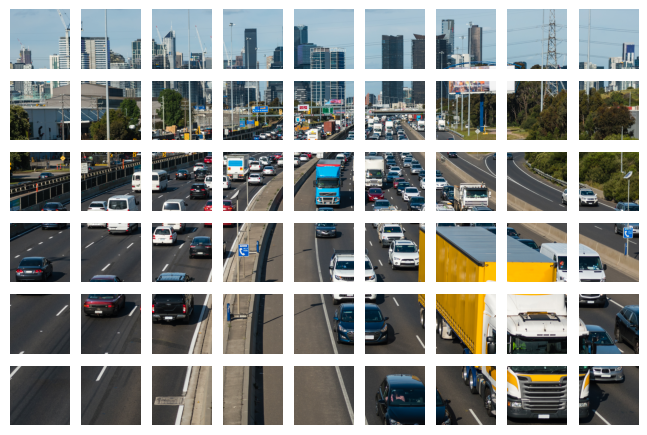

Number of generated images: 54


In [8]:
data_all_crops = get_crops(image, shape_x=500, shape_y=500, overlap_x=0, overlap_y=0, show=True)

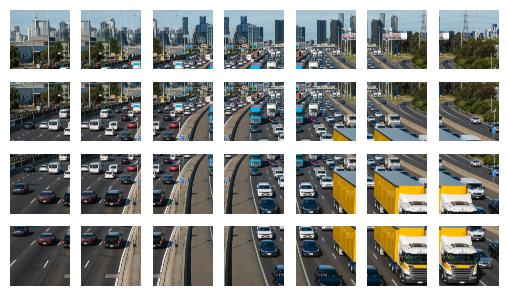

Number of generated images: 28


In [9]:
data_all_crops = get_crops(image, shape_x=1200, shape_y=1200, overlap_x=50, overlap_y=50, show=True)

Exemple of one outut crop from the list:

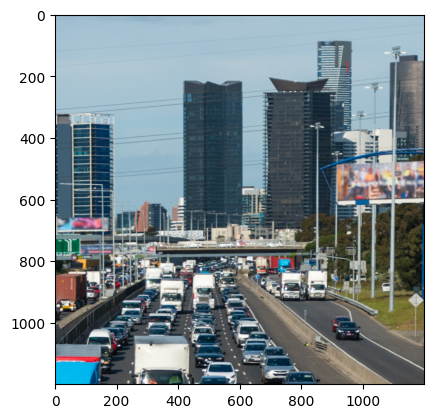

In [10]:
plt.imshow(cv2.cvtColor(data_all_crops[4].copy(), cv2.COLOR_BGR2RGB));

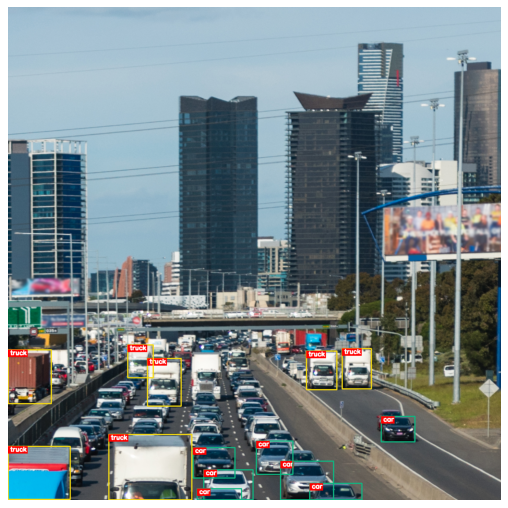

In [11]:
visualize_results_usual_yolo_inference(
    data_all_crops[4].copy(),
    model,
    imgsz,
    conf,
    iou,
    delta_colors=3,
    thickness=2,
    font_scale=0.5,
    dpi=80,
)